In [1]:

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up matplotlib style 
plt.style.use('ggplot')

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime
from string import punctuation

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize 

#model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from itertools import compress
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import shap

In [2]:
data = pd.read_csv('../output/amazon_echo_dot446.csv')

# getting the shape of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            4460 non-null   float64
 1   date              4460 non-null   object 
 2   shop              4460 non-null   object 
 3   title             4460 non-null   object 
 4   verified_reviews  4460 non-null   object 
dtypes: float64(1), object(4)
memory usage: 174.3+ KB


In [3]:
# describing the data set

data.describe()

,rating
count,4460.000000
mean,4.674664
std,0.684781
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
# checking if there is any null data or not

data.isnull().any().any()

False

In [5]:
# adding a length column for analyzing the length of the reviews

data['length'] = data['verified_reviews'].apply(len)

data.groupby('length').describe().sample(10)

rating                                               
        count      mean       std  min   25%  50%   75%  max
length                                                      
399       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
390       4.0  4.000000  0.816497  3.0  3.75  4.0  4.25  5.0
540       3.0  4.000000  1.000000  3.0  3.50  4.0  4.50  5.0
312       7.0  4.857143  0.377964  4.0  5.00  5.0  5.00  5.0
838       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
145       6.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0
394       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0
424       3.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0
371       9.0  4.666667  0.707107  3.0  5.00  5.0  5.00  5.0
917       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0

In [6]:
data.groupby('rating').describe()

length                                                              
         count        mean         std    min     25%    50%     75%     max
rating                                                                      
1.0       41.0  455.048780  374.536978  136.0  217.00  295.0  555.00  1869.0
2.0       50.0  397.080000  243.416569  165.0  271.00  346.0  428.25  1497.0
3.0      160.0  398.700000  277.482546  152.0  233.50  307.5  443.00  1923.0
4.0      817.0  343.965728  206.301634   82.0  222.00  287.0  401.00  2229.0
5.0     3392.0  303.049233  163.980279   82.0  207.75  262.0  350.00  2302.0

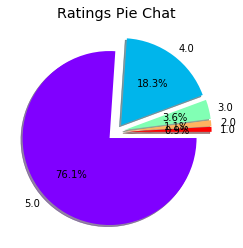

In [7]:
import matplotlib.cm as cm
import matplotlib.cm as cm

#count data rating
counts = data.rating.value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Ratings Pie Chat')
plt.show()

Text(0.5, 1.0, 'Counts of each shops')

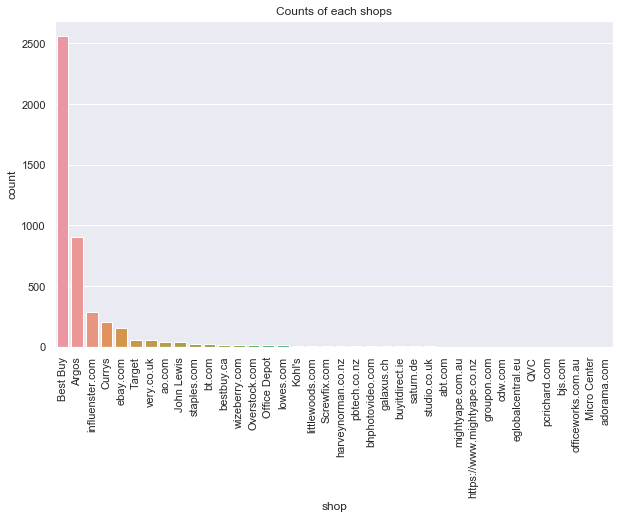

In [8]:
import seaborn as sns

#reviews on shops 
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data.shop,
              order = data['shop'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each shops')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4405 entries, 0 to 4459
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            4405 non-null   float64
 1   date              4405 non-null   object 
 2   shop              4405 non-null   object 
 3   title             4405 non-null   object 
 4   verified_reviews  4405 non-null   object 
 5   length            4405 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 240.9+ KB


Text(0.5, 1.0, 'Counts of each shops')

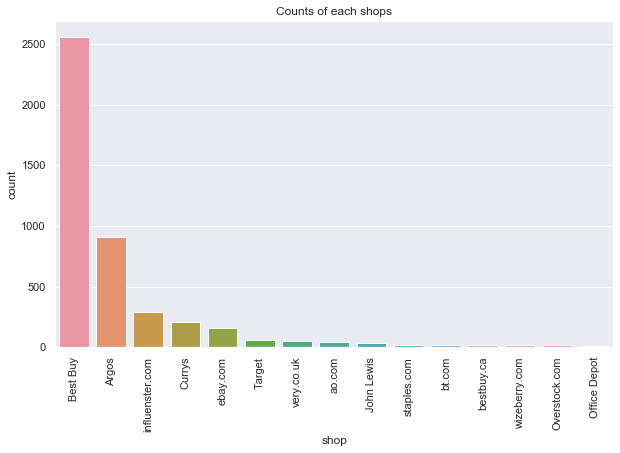

In [9]:
#top 15 shop
top15 = data['shop'].value_counts().nlargest(15).index
data = data[data.shop.isin(top15)]
data.info()
#reviews on shops 
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data.shop,
              order = data['shop'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each shops')

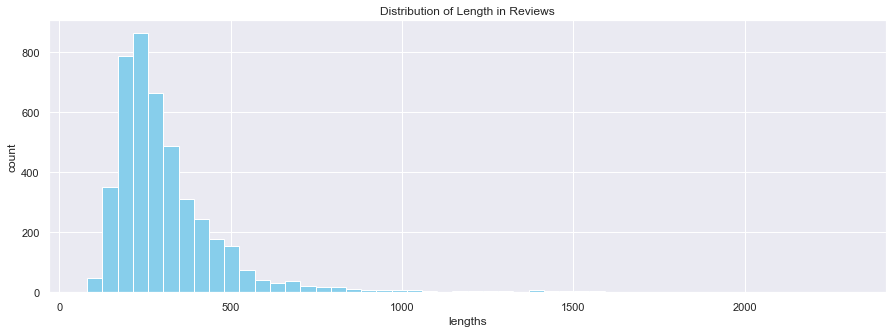

In [10]:
data['length'].hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

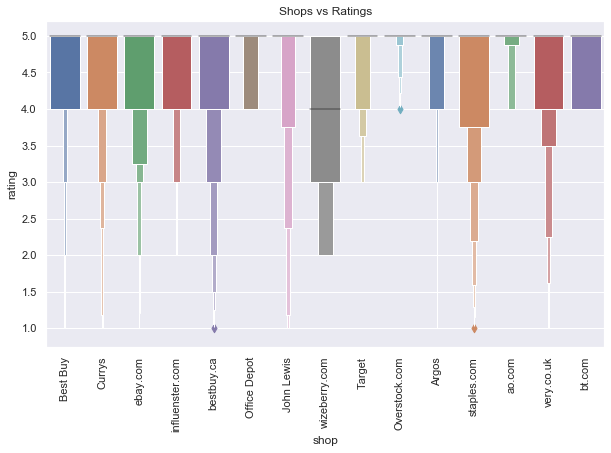

In [12]:
#plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('fivethirtyeight')
sns.boxenplot(data['shop'], data['rating'], palette = 'deep')
#sns.boxplot(data.shop, data.rating)
#sns.swarmplot(data['shop'], data['rating'], palette = 'deep')

plt.title("Shops vs Ratings")
plt.xticks(rotation = 90)
plt.show()

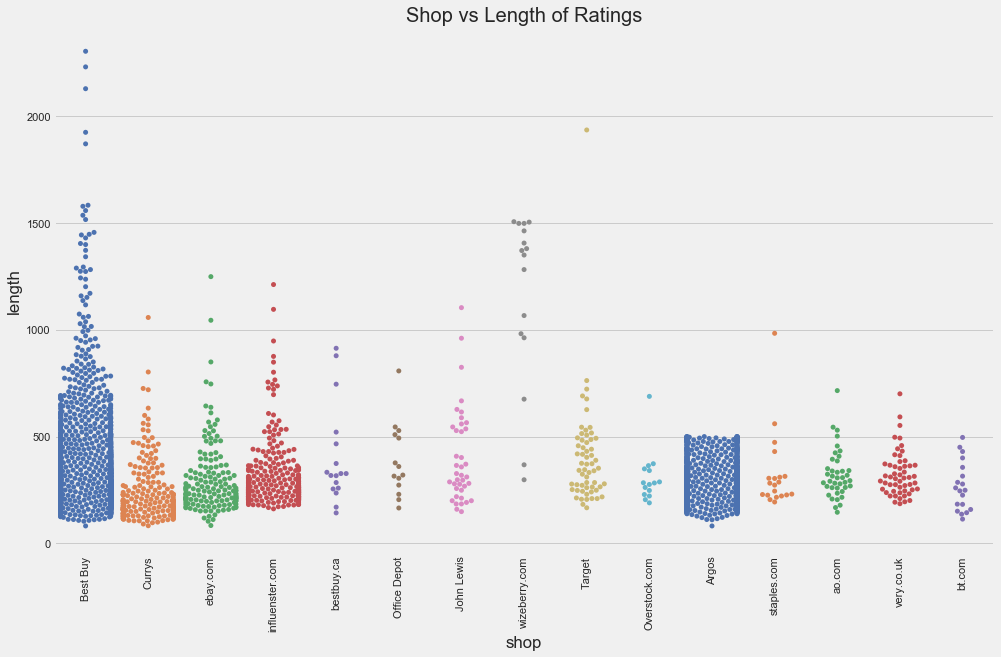

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['shop'], data['length'], palette = 'deep')
plt.title("Shop vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

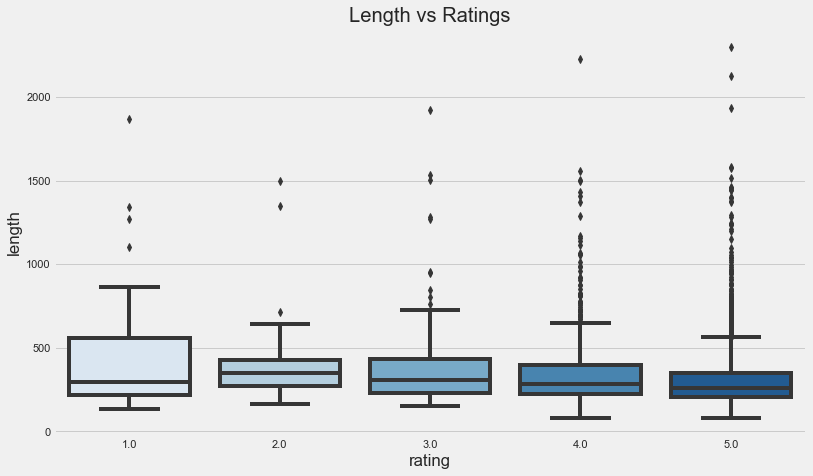

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title("Length vs Ratings")
plt.show()

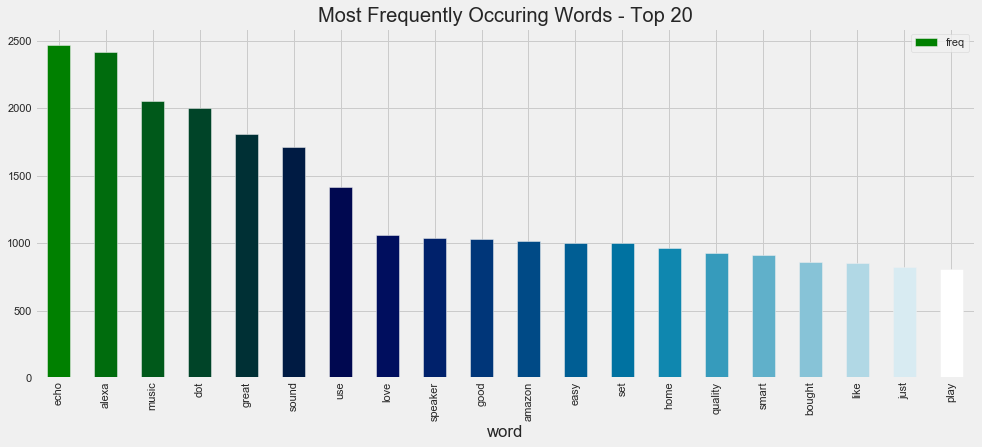

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

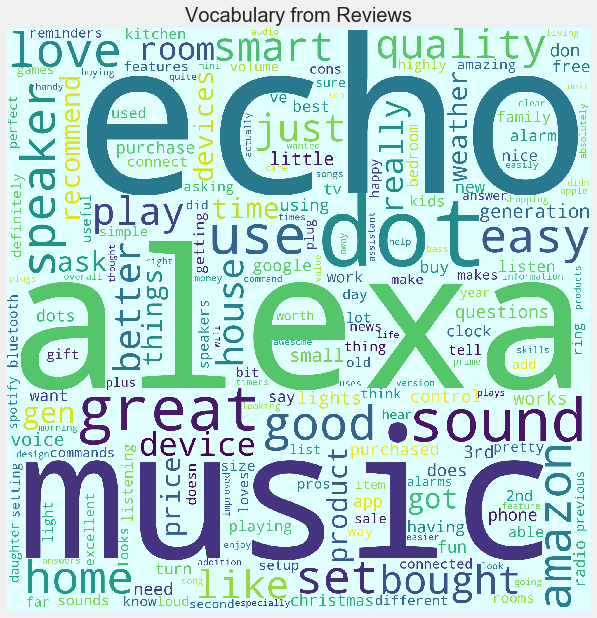

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()